#Import Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.decomposition import PCA

#Load contoh dataset Mall Customers data

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/My Drive/tubes ildat
!ls

Mounted at /content/drive
/content/drive/My Drive/tubes ildat
data_keuangan_labeled.csv  dataset_keuangan.csv


In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/tubes ildat/dataset_keuangan.csv')
dataset

,Gaji,Tabungan Lama,Investasi,Pemasukan Lainnya,Tipe,Bahan Pokok,Protein & Gizi Tambahan,Tempat Tinggal,Sandang,Konsumsi Praktis,Barang & Jasa Sekunder,Pengeluaran Tidak Esensial,Pajak,Asuransi,Sosial & Budaya,Tabungan / Investasi
0,24333000.0,1629000.0,7891000.0,3861000.0,normal,3694000.0,3570000.0,10682000.0,994000.0,5563000.0,5140000.0,1282000.0,876000.0,528000.0,458000.0,4950000.0
1,3535000.0,733000.0,785000.0,659000.0,hemat,383000.0,994000.0,1432000.0,134000.0,438000.0,475000.0,230000.0,159000.0,263000.0,174000.0,1062000.0
2,65000000.0,9642000.0,13643000.0,10842000.0,hemat,7849000.0,13081000.0,24853000.0,1810000.0,3819000.0,6465000.0,2545000.0,4910000.0,3580000.0,4686000.0,24775000.0
3,54676000.0,5037000.0,18466000.0,4826000.0,normal,5367000.0,13703000.0,16628000.0,2746000.0,8826000.0,11029000.0,3489000.0,2308000.0,2015000.0,1759000.0,14771000.0
4,24298000.0,4665000.0,4964000.0,2649000.0,boros,2169000.0,5477000.0,7866000.0,366000.0,8454000.0,6060000.0,2956000.0,277000.0,285000.0,438000.0,2300000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,38323000.0,4781000.0,11977000.0,6186000.0,boros,3317000.0,7279000.0,10936000.0,1968000.0,11867000.0,13335000.0,6414000.0,543000.0,369000.0,594000.0,4709000.0
15996,13432000.0,2485000.0,4412000.0,1166000.0,normal,2864000.0,3543000.0,7092000.0,382000.0,1506000.0,2290000.0,719000.0,353000.0,644000.0,358000.0,1873000.0
15997,22432000.0,3639000.0,8754000.0,5595000.0,hemat,1922000.0,5125000.0,11150000.0,631000.0,3321000.0,4375000.0,1056000.0,1263000.0,1052000.0,1562000.0,8887000.0
15998,22499000.0,4321000.0,7354000.0,2934000.0,hemat,3641000.0,3978000.0,10231000.0,960000.0,3589000.0,2492000.0,822000.0,1472000.0,1425000.0,1161000.0,7332000.0


In [ ]:
dataset['total_income'] = (
    dataset['Gaji'] +
    dataset['Tabungan Lama'] +
    dataset['Investasi'] +
    dataset['Pemasukan Lainnya']
)

In [ ]:
dataset['total_expenses'] = (
    dataset['Bahan Pokok'] +
    dataset['Protein & Gizi Tambahan'] +
    dataset['Tempat Tinggal'] +
    dataset['Sandang'] +
    dataset['Konsumsi Praktis'] +
    dataset['Barang & Jasa Sekunder'] +
    dataset['Pengeluaran Tidak Esensial'] +
    dataset['Pajak'] +
    dataset['Asuransi'] +
    dataset['Sosial & Budaya']
)


In [ ]:
dataset['expense_ratio'] = dataset['total_expenses'] / dataset['total_income']
dataset['saving_ratio'] = dataset['Tabungan / Investasi'] / dataset['total_income']

In [ ]:
X = dataset[['total_income',
             'total_expenses',
             'expense_ratio',
             'saving_ratio']].values

#Menentukan jumlah cluster optimal menggunakan Elbow Method

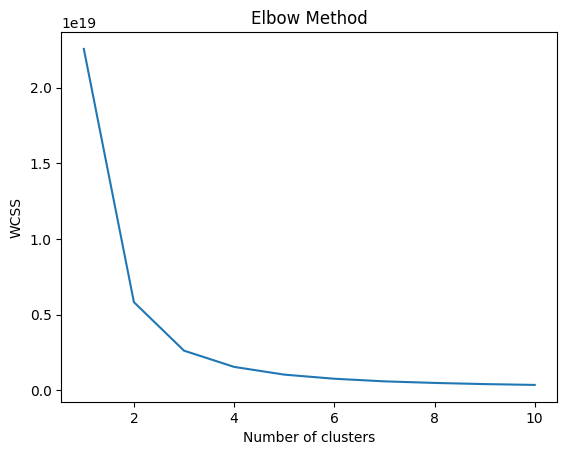

In [ ]:
#tulis jawaban di sini

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#Melakukan Clustering

In [ ]:
#Tentukan jumlah cluster berdasarkan hasil Elbow Method (isi pada bagian "n_clusters= .....")
kmeans = KMeans(n_clusters= 3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans

KMeans(n_clusters=3, n_init=10, random_state=0)

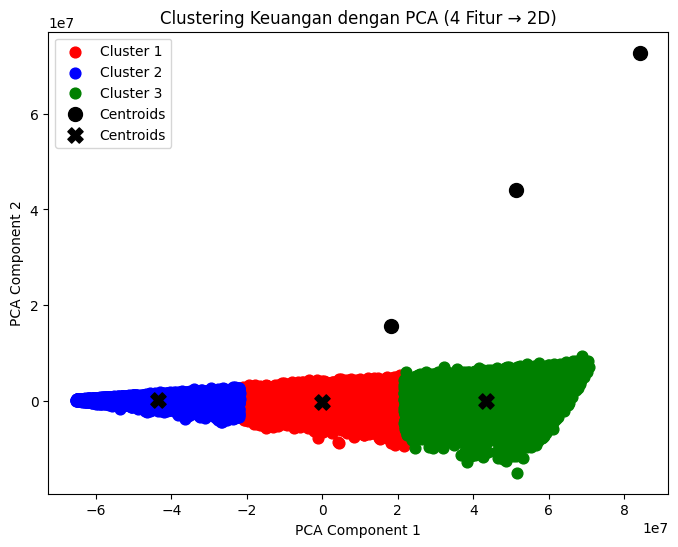

In [ ]:
y_kmeans = kmeans.fit_predict(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

centroids_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[y_kmeans == 0, 0], X_pca[y_kmeans == 0, 1], s=60, c='red', label='Cluster 1')
plt.scatter(X_pca[y_kmeans == 1, 0], X_pca[y_kmeans == 1, 1], s=60, c='blue', label='Cluster 2')
plt.scatter(X_pca[y_kmeans == 2, 0], X_pca[y_kmeans == 2, 1], s=60, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')

plt.scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    s=120,
    c='black',
    marker='X',
    label='Centroids'
)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering Keuangan dengan PCA (4 Fitur → 2D)')
plt.legend()
plt.show()

In [ ]:
y_kmeans

array([0, 1, 2, ..., 0, 0, 1], dtype=int32)

In [ ]:
dataset['cluster'] = y_kmeans

In [ ]:
dataset['cluster'].value_counts()

,count
cluster,
0,5494
2,5284
1,5222


In [ ]:
dataset.groupby('cluster').mean(numeric_only=True)


,Gaji,Tabungan Lama,Investasi,Pemasukan Lainnya,Bahan Pokok,Protein & Gizi Tambahan,Tempat Tinggal,Sandang,Konsumsi Praktis,Barang & Jasa Sekunder,Pengeluaran Tidak Esensial,Pajak,Asuransi,Sosial & Budaya,Tabungan / Investasi,total_income,total_expenses,expense_ratio,saving_ratio
cluster,,,,,,,,,,,,,,,,,,,
0,3.067031e+07,5.165426e+06,1.020876e+07,5.156241e+06,3.786956e+06,6.808164e+06,1.230435e+07,1.025842e+06,7.113767e+06,7.354805e+06,2.280474e+06,1.150776e+06,1.128894e+06,1.006771e+06,7.246288e+06,5.120073e+07,4.396080e+07,0.860764,0.139354
1,1.094159e+07,1.822031e+06,3.640202e+06,1.820431e+06,1.352285e+06,2.409654e+06,4.362002e+06,3.625101e+05,2.572052e+06,2.650081e+06,8.252664e+05,4.066040e+05,3.962009e+05,3.479764e+05,2.542615e+06,1.822425e+07,1.568463e+07,0.862514,0.137585
2,5.056212e+07,8.393412e+06,1.680797e+07,8.341967e+06,6.265196e+06,1.116332e+07,2.015542e+07,1.681042e+06,1.200210e+07,1.240931e+07,3.847013e+06,1.799161e+06,1.784445e+06,1.592998e+06,1.141156e+07,8.410547e+07,7.270000e+07,0.865128,0.134962


In [ ]:
cluster_names = {
    0: 'Rawan Finansial',
    1: 'Menengah Stabil',
    2: 'Sehat Finansial'
}

dataset['cluster_label'] = dataset['cluster'].map(cluster_names)


In [ ]:
dataset

,Gaji,Tabungan Lama,Investasi,Pemasukan Lainnya,Tipe,Bahan Pokok,Protein & Gizi Tambahan,Tempat Tinggal,Sandang,Konsumsi Praktis,...,Pajak,Asuransi,Sosial & Budaya,Tabungan / Investasi,total_income,total_expenses,expense_ratio,saving_ratio,cluster,cluster_label
0,24333000.0,1629000.0,7891000.0,3861000.0,normal,3694000.0,3570000.0,10682000.0,994000.0,5563000.0,...,876000.0,528000.0,458000.0,4950000.0,37714000.0,32787000.0,0.869359,0.131251,0,Rawan Finansial
1,3535000.0,733000.0,785000.0,659000.0,hemat,383000.0,994000.0,1432000.0,134000.0,438000.0,...,159000.0,263000.0,174000.0,1062000.0,5712000.0,4682000.0,0.819678,0.185924,1,Menengah Stabil
2,65000000.0,9642000.0,13643000.0,10842000.0,hemat,7849000.0,13081000.0,24853000.0,1810000.0,3819000.0,...,4910000.0,3580000.0,4686000.0,24775000.0,99127000.0,73598000.0,0.742462,0.249932,2,Sehat Finansial
3,54676000.0,5037000.0,18466000.0,4826000.0,normal,5367000.0,13703000.0,16628000.0,2746000.0,8826000.0,...,2308000.0,2015000.0,1759000.0,14771000.0,83005000.0,67870000.0,0.817662,0.177953,2,Sehat Finansial
4,24298000.0,4665000.0,4964000.0,2649000.0,boros,2169000.0,5477000.0,7866000.0,366000.0,8454000.0,...,277000.0,285000.0,438000.0,2300000.0,36576000.0,34348000.0,0.939086,0.062883,0,Rawan Finansial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,38323000.0,4781000.0,11977000.0,6186000.0,boros,3317000.0,7279000.0,10936000.0,1968000.0,11867000.0,...,543000.0,369000.0,594000.0,4709000.0,61267000.0,56622000.0,0.924184,0.076860,0,Rawan Finansial
15996,13432000.0,2485000.0,4412000.0,1166000.0,normal,2864000.0,3543000.0,7092000.0,382000.0,1506000.0,...,353000.0,644000.0,358000.0,1873000.0,21495000.0,19751000.0,0.918865,0.087137,1,Menengah Stabil
15997,22432000.0,3639000.0,8754000.0,5595000.0,hemat,1922000.0,5125000.0,11150000.0,631000.0,3321000.0,...,1263000.0,1052000.0,1562000.0,8887000.0,40420000.0,31457000.0,0.778253,0.219866,0,Rawan Finansial
15998,22499000.0,4321000.0,7354000.0,2934000.0,hemat,3641000.0,3978000.0,10231000.0,960000.0,3589000.0,...,1472000.0,1425000.0,1161000.0,7332000.0,37108000.0,29771000.0,0.802280,0.197585,0,Rawan Finansial


In [ ]:
dataset_simpan = dataset.drop(columns=[
    'total_income',
    'total_expenses',
    'expense_ratio',
    'saving_ratio'
])

In [ ]:
dataset_simpan

,Gaji,Tabungan Lama,Investasi,Pemasukan Lainnya,Tipe,Bahan Pokok,Protein & Gizi Tambahan,Tempat Tinggal,Sandang,Konsumsi Praktis,Barang & Jasa Sekunder,Pengeluaran Tidak Esensial,Pajak,Asuransi,Sosial & Budaya,Tabungan / Investasi,cluster,cluster_label
0,24333000.0,1629000.0,7891000.0,3861000.0,normal,3694000.0,3570000.0,10682000.0,994000.0,5563000.0,5140000.0,1282000.0,876000.0,528000.0,458000.0,4950000.0,0,Rawan Finansial
1,3535000.0,733000.0,785000.0,659000.0,hemat,383000.0,994000.0,1432000.0,134000.0,438000.0,475000.0,230000.0,159000.0,263000.0,174000.0,1062000.0,1,Menengah Stabil
2,65000000.0,9642000.0,13643000.0,10842000.0,hemat,7849000.0,13081000.0,24853000.0,1810000.0,3819000.0,6465000.0,2545000.0,4910000.0,3580000.0,4686000.0,24775000.0,2,Sehat Finansial
3,54676000.0,5037000.0,18466000.0,4826000.0,normal,5367000.0,13703000.0,16628000.0,2746000.0,8826000.0,11029000.0,3489000.0,2308000.0,2015000.0,1759000.0,14771000.0,2,Sehat Finansial
4,24298000.0,4665000.0,4964000.0,2649000.0,boros,2169000.0,5477000.0,7866000.0,366000.0,8454000.0,6060000.0,2956000.0,277000.0,285000.0,438000.0,2300000.0,0,Rawan Finansial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,38323000.0,4781000.0,11977000.0,6186000.0,boros,3317000.0,7279000.0,10936000.0,1968000.0,11867000.0,13335000.0,6414000.0,543000.0,369000.0,594000.0,4709000.0,0,Rawan Finansial
15996,13432000.0,2485000.0,4412000.0,1166000.0,normal,2864000.0,3543000.0,7092000.0,382000.0,1506000.0,2290000.0,719000.0,353000.0,644000.0,358000.0,1873000.0,1,Menengah Stabil
15997,22432000.0,3639000.0,8754000.0,5595000.0,hemat,1922000.0,5125000.0,11150000.0,631000.0,3321000.0,4375000.0,1056000.0,1263000.0,1052000.0,1562000.0,8887000.0,0,Rawan Finansial
15998,22499000.0,4321000.0,7354000.0,2934000.0,hemat,3641000.0,3978000.0,10231000.0,960000.0,3589000.0,2492000.0,822000.0,1472000.0,1425000.0,1161000.0,7332000.0,0,Rawan Finansial


#Menyimpan Dataset yang sudah di clustering

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

dataset_simpan.to_csv('/content/drive/MyDrive/tubes ildat/data_keuangan_labeled.csv', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
